In [84]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn import metrics
import time
import matplotlib.pyplot as plt
import pandas as pd
from os import path
import gc
import numpy as np
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import StratifiedKFold
import os
from scipy import interp  
import matplotlib.pyplot as plt  
from sklearn.metrics import roc_curve, auc,roc_auc_score
from scipy import interp
from itertools import cycle


In [151]:
len(train_val_xy.columns)

124

In [139]:
final_feature = pd.read_csv("C:\\Users\\CDA\\graduated_design\\score\\final_feature.csv")

list_final_feature = final_feature["final_feture"].tolist()

list_final_feature.extend(["user_id"])
final_train = final_train[list_final_feature]



common_path_1 = "C:\\Users\\CDA\\graduated_design\\data\\train_data\\"
overdue_train = pd.read_table(os.path.join(common_path_1,"overdue_train.txt"),sep = ",",header = None, names = ["user_id","is_overdue"])
final_train = pd.merge(final_train,overdue_train,how = "inner",on = "user_id")
train_val_xy,offline_xy = train_test_split(final_train,test_size = 0.15,random_state = 7)
offline_x = offline_xy.drop(["user_id","is_overdue"],axis = 1)
offline_y = offline_xy["is_overdue"]

train_val_x = train_val_xy.drop(["user_id","is_overdue"],axis = 1)
train_val_y = train_val_xy["is_overdue"]

train_xy,val_xy = train_test_split(train_val_xy,test_size = 0.2,random_state = 7)
train_X = train_xy.drop(["user_id","is_overdue"],axis = 1)
train_y = train_xy["is_overdue"]
val_X = val_xy.drop(["user_id","is_overdue"],axis = 1)
val_y = val_xy["is_overdue"]

In [32]:
len(X_train)

30244

In [68]:
kf = StratifiedKFold(n_splits=5,random_state = 100)
?kf.split

In [147]:
import matplotlib
#train_xy,val_xy = train_test_split(train_val_xy,test_size = 0.2,random_state = 11)
#train_val_y = train_xy["is_overdue"]
#train_val_x = train_xy.drop(["user_id","is_overdue"],axis = 1)
#val_y = val_xy["is_overdue"]
#val_x = val_xy.drop(["user_id","is_overdue"],axis = 1)

def kfold_plot(train_x, train_y, model):
    kf = StratifiedKFold(n_splits=5,random_state = 100)

    scores = []
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    exe_time = []
    colors = ['cyan', 'indigo', 'seagreen', 'yellow', 'blue']
    #cmap = matplotlib.colors.ListedColormap(colors)
    lw = 2

    #flg,ax = plt.subplots(figsize = (8,5))
    i = 0
    for train_index,val_index in kf.split(train_x,train_y):
        t_X, v_X = train_x.iloc[train_index], train_x.iloc[val_index]
        t_y, v_y = train_y.iloc[train_index], train_y.iloc[val_index]
        begin_t = time.time()
        predictions = model(t_X,t_y,v_X)
        end_t = time.time()
        exe_time.append(round(end_t-begin_t, 3))
        scores.append(roc_auc_score(v_y.astype(float), predictions))
        fpr, tpr, thresholds = roc_curve(v_y, predictions)#?
        mean_tpr += interp(mean_fpr, fpr, tpr)#?
        mean_tpr[0] = 0.0#?
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=lw, color=colors[i], label='ROC fold %d (area = %0.4f)' % (i,roc_auc))
        i += 1
        print(ks(predictions,v_y))
    plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k', label='Luck')
    mean_tpr /= kf.get_n_splits(train_val_x, train_val_y)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)    
    plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--', label='Mean ROC (area = %0.4f)' % mean_auc, lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('RF-5fold-ROC')
    plt.legend(loc='lower right')
    plt.savefig("RF-5fold-ROC")
    plt.show()

In [108]:
scores

[0.76358417998710559,
 0.76389637529496579,
 0.76301689284682106,
 0.76235070680636585,
 0.76367196308282548]

('ks', 0.3981858082811579)
('ks', 0.40210971976612664)
('ks', 0.38808806895123388)
('ks', 0.41405632620590699)
('ks', 0.38937811783998721)


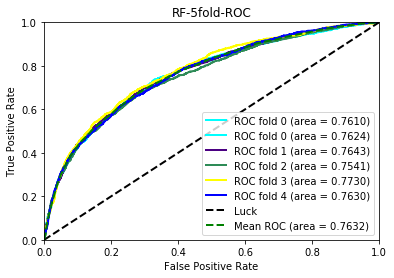

In [150]:
kfold_plot(train_val_x, train_val_y, RF_model)

In [6]:
clf = RandomForestClassifier(n_estimators=100,min_samples_leaf = 20，min_samples_split = 6)
clf = clf.fit(train_data, train_labels)

In [100]:
tv_X = train_val_xy.drop(["user_id","is_overdue"],axis = 1)
tv_y = train_val_xy["is_overdue"]

In [145]:
#train_xy,val_xy = train_test_split(final_train,test_size = 0.2,random_state = 11)
#X = final_train.drop("is_overdue",axis = 1)
#y = final_train["is_overdue"]

RF_model = RandomForestClassifier(max_depth = 12,n_jobs = 2,n_estimators = 55,min_impurity_split = 0.03,
                               min_samples_split = 10,min_samples_leaf = 40,max_features = 0.75,max_depth = 10)
                            
param_dist = {
              "max_features":[0.75,0.85]
              #"min_samples_leaf" : [37,35],#25 30 40 35 35
              #"max_features":[0.65,0.6]
              #"n_estimators":[72,64]，
              }
grid_search = GridSearchCV(model,param_grid = param_dist,scoring = "roc_auc", cv = 5,verbose=5, n_jobs=2)  
grid_search.fit(train_X,train_y)
print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:  3.4min
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed: 18.8min
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed: 43.0min
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed: 75.8min
[Parallel(n_jobs=2)]: Done 320 out of 320 | elapsed: 86.3min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=0.75, max_leaf_nodes=None,
            min_impurity_split=0.03, min_samples_leaf=40,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=55, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
0.763035277699
{'min_impurity_split': 0.03, 'max_features': 0.75, 'n_estimators': 55, 'min_samples_split': 10, 'min_samples_leaf': 40, 'max_depth': 10}


In [146]:
def RF_model(train_x,train_y,val_x):
    RF_model = RandomForestClassifier(max_depth = 12,n_jobs = 2,n_estimators = 55,min_impurity_split = 0.03,
                               min_samples_split = 10,min_samples_leaf = 40,max_features = 0.75)
    RF_model.fit(train_x,train_y)
    pred = RF_model.predict_proba(val_x)
    return pred[:,1]

In [149]:
def ks(y_predicted, y_true):
    label=y_true
    fpr,tpr,thres = metrics.roc_curve(label,y_predicted,pos_label=1)
    return 'ks',abs(fpr - tpr).max()

In [156]:
RF_model = RandomForestClassifier(n_jobs = 2,n_estimators = 55,min_impurity_split = 0.03,
                               min_samples_split = 10,min_samples_leaf = 40,max_features = 0.75,max_depth = 10)
RF_model.fit(train_val_x,train_val_y)
pred = RF_model.predict_proba(offline_x)

In [158]:
pred

array([[ 0.84593384,  0.15406616],
       [ 0.94797135,  0.05202865],
       [ 0.69789653,  0.30210347],
       ..., 
       [ 0.95330273,  0.04669727],
       [ 0.95801993,  0.04198007],
       [ 0.96969046,  0.03030954]])

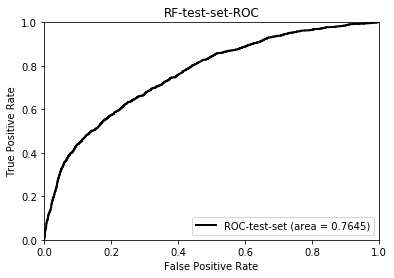

0.383464129299


In [159]:
fpr, tpr, thresholds = roc_curve(offline_y, pred[:,1])#?
#mean_tpr += interp(mean_fpr, fpr, tpr)#?
#mean_tpr[0] = 0.0#?
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, color="k", label='ROC-test-set (area = %0.4f)' % (roc_auc))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF-test-set-ROC')
plt.legend(loc='lower right')
plt.savefig("RF-test-set-ROC")
plt.show()
print(abs(fpr-tpr).max())

175

In [160]:
offline = offline_xy[["user_id"]]
offline["rf_prob"] = pred[:,1]
#offline.reset_index()
offline

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


user_id   rf_prob
32653    32654  0.154066
36081    36082  0.052029
49056    49057  0.302103
29127    29128  0.055747
55186    55187  0.216778
31342    31343  0.188811
47880    47881  0.067180
50989    50990  0.190488
13087    13088  0.093131
6031      6032  0.075971
15738    15739  0.036848
47039    47040  0.089292
55594    55595  0.051691
21742    21743  0.129993
22378    22379  0.045641
39857    39858  0.048215
32052    32053  0.057183
6300      6301  0.217609
32112    32113  0.023694
30421    30422  0.051732
5309      5310  0.032106
33293    33294  0.029240
43473    43474  0.104980
38515    38516  0.085278
26387    26388  0.057259
13399    13400  0.076828
50086    50087  0.054442
21807    21808  0.064805
36551    36552  0.250281
46736    46737  0.149892
...        ...       ...
13536    13537  0.235214
13328    13329  0.061705
54022    54023  0.204610
8203      8204  0.059262
29715    29716  0.046865
51020    51021  0.127556
18557    18558  0.125302
39619    39620  0.105028
52327    52328  0.172246
41026    41027  0.165300
13751    13752  0.122518
52371    52372  0.083323
7446      7447  0.386432
11793    11794  0.041247
14886    14887  0.048119
36754    36755  0.155093
38056    38057  0.042722
37921    37922  0.044161
37578    37579  0.021243
45909    45910  0.100012
12617    12618  0.060620
35409    35410  0.095653
49024    49025  0.022562
48393    48394  0.175732
17373    17374  0.079991
2432      2433  0.109432
51737    51738  0.032026
26661    26662  0.046697
8570      8571  0.041980
7359      7360  0.030310

[8340 rows x 2 columns]

In [161]:
#del offline["is_overdue"]
offline.to_csv("C:\\Users\\CDA\\graduated_design\\prob\\RF_prob_122.csv",index = False,encoding = "utf-8")

In [127]:
del offline["index"]

In [115]:
DataFrame(pred[:,1],columns = ["RF_pro"])

RF_pro
0     0.264593
1     0.043387
2     0.342776
3     0.062804
4     0.209014
5     0.212922
6     0.104614
7     0.193913
8     0.071427
9     0.086743
10    0.044698
11    0.091019
12    0.044595
13    0.110581
14    0.035538
15    0.052192
16    0.036674
17    0.183660
18    0.017531
19    0.060584
20    0.048023
21    0.042114
22    0.094030
23    0.093521
24    0.057129
25    0.069402
26    0.051971
27    0.059754
28    0.207164
29    0.137884
...        ...
8310  0.192244
8311  0.046491
8312  0.181566
8313  0.056638
8314  0.054677
8315  0.132176
8316  0.148411
8317  0.074858
8318  0.154597
8319  0.167528
8320  0.064225
8321  0.083739
8322  0.326866
8323  0.034161
8324  0.053882
8325  0.132272
8326  0.037968
8327  0.060641
8328  0.015199
8329  0.094980
8330  0.056266
8331  0.091557
8332  0.028780
8333  0.207152
8334  0.076096
8335  0.082176
8336  0.044733
8337  0.030517
8338  0.031760
8339  0.025371

[8340 rows x 1 columns]

In [14]:
RF_model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features=0.65, max_leaf_nodes=None,
            min_impurity_split=0.03, min_samples_leaf=35,
            min_samples_split=6, min_weight_fraction_leaf=0,
            n_estimators=60, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
RF_model.fit(train_X,train_y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features=0.65, max_leaf_nodes=None,
            min_impurity_split=0.03, min_samples_leaf=35,
            min_samples_split=6, min_weight_fraction_leaf=0,
            n_estimators=60, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [56]:
#pred = RF_model.predict(val_X)
from sklearn.metrics import roc_curve,auc
pred_RF = grid_search.predict_proba(val_X)
fpr,tpr,threshold = roc_curve(val_y,pred_RF[:,1],pos_label = 1)
abs(fpr - tpr).max()

0.38214902117180866

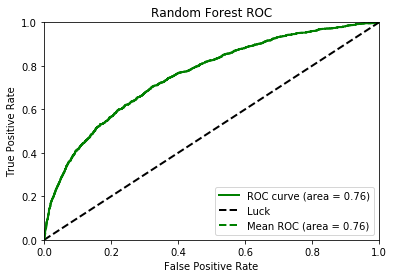

In [67]:

lw = 2
fig,ax = plt.subplots(figsize = (6,4))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

fpr, tpr, thresholds = roc_curve(val_y, pred_RF[:,1])#?
mean_tpr += interp(mean_fpr, fpr, tpr)#?
mean_tpr[0] = 0.0#?
roc_auc = auc(fpr, tpr)
ax.plot(fpr, tpr, lw=lw, color="g", label='ROC curve (area = %0.2f)' % ( roc_auc))
ax.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k', label='Luck')
#mean_tpr /= kf.get_n_splits(train, ytrain)
#mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)    
ax.plot(mean_fpr, mean_tpr, color='g', linestyle='--', label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)
ax.set_xlim([0, 1.0])
ax.set_ylim([0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Random Forest ROC')
ax.legend(loc='lower right')
plt.savefig("Random Forest ROC")
plt.show()


In [32]:
from pandas import DataFrame,Series
RF_feature_importance_score = DataFrame(RF_model.feature_importances_)
RF_feature_importance_score.columns = ["RF_score"]

In [33]:
RF_feature_importance_score

RF_score
0    0.001587
1    0.006690
2    0.004950
3    0.006377
4    0.005518
5    0.004021
6    0.007052
7    0.006262
8    0.030173
9    0.007730
10   0.005813
11   0.006700
12   0.003823
13   0.008574
14   0.005246
15   0.003563
16   0.006325
17   0.006451
18   0.001492
19   0.005882
20   0.006013
21   0.012048
22   0.004195
23   0.005834
24   0.007048
25   0.006452
26   0.005590
27   0.002674
28   0.002698
29   0.003063
..        ...
143  0.014560
144  0.071651
145  0.000000
146  0.020010
147  0.334826
148  0.050907
149  0.000620
150  0.001377
151  0.000000
152  0.000877
153  0.000583
154  0.001043
155  0.000000
156  0.000998
157  0.001388
158  0.005486
159  0.000000
160  0.001742
161  0.000466
162  0.001169
163  0.000000
164  0.000114
165  0.001129
166  0.000849
167  0.000432
168  0.002869
169  0.005983
170  0.007168
171  0.000983
172  0.007381

[173 rows x 1 columns]

In [34]:
feature_name = DataFrame(train_X.columns,columns = ["feature_name"])
feature_name

feature_name
0                        bill_bank_card_num
1                   bl_last_bill_amountmean
2                       bl_credit_limitmean
3                       bl_bill_balancemean
4                 bl_lowest_repay_limitmean
5                         bl_consum_nummean
6                        bl_bill_amountmean
7                   bl_avail_cash_limitmean
8             bl_bill_diff_repay_amountmean
9    bl_credit_limit_diff_last_bill_amomean
10        bl_credit_limit_diff_bill_amomean
11    bl_credit_limit_diff_bill_balancemean
12           bl_bill_amo_div_consum_nummean
13              bl_grant_diff_bill_timemean
14                   bl_last_bill_amountmax
15                       bl_credit_limitmax
16                       bl_bill_balancemax
17                 bl_lowest_repay_limitmax
18                         bl_consum_nummax
19                        bl_bill_amountmax
20                   bl_avail_cash_limitmax
21             bl_bill_diff_repay_amountmax
22    bl_credit_limit_diff_last_bill_amomax
23         bl_credit_limit_diff_bill_amomax
24     bl_credit_limit_diff_bill_balancemax
25            bl_bill_amo_div_consum_nummax
26               bl_grant_diff_bill_timemax
27                   bl_last_bill_amountstd
28                       bl_credit_limitstd
29                       bl_bill_balancestd
..                                      ...
143                        bh_time_max_diff
144                       grant_bh_diff_bef
145                              has_record
146                        total_counts_bef
147                         dup_counts_time
148                                gender_0
149                                gender_1
150                                gender_2
151                             ocupation_0
152                             ocupation_2
153                             ocupation_3
154                             ocupation_4
155                             education_0
156                             education_2
157                             education_3
158                             education_4
159                              marriage_0
160                              marriage_1
161                              marriage_2
162                              marriage_3
163                              marriage_4
164                             residence_0
165                             residence_1
166                             residence_2
167                             residence_3
168                             residence_4
169                        bank_expenditure
170                            bank_revenue
171                             bank_income
172                     bank_diff_rev_exped

[173 rows x 1 columns]

In [38]:
RF_importance = pd.merge(feature_name,RF_feature_importance_score,left_index = True,right_index = True)

In [43]:
RF_importance.sort_values(by = "RF_score",ascending = False,inplace = True)

In [109]:
RF_importance.to_csv("C:\\Users\\CDA\\graduated_design\\score\\RF_importance.csv",index = False)

In [47]:
RF_importance

feature_name  RF_score
147                         dup_counts_time  0.334826
144                       grant_bh_diff_bef  0.071651
148                                gender_0  0.050907
8             bl_bill_diff_repay_amountmean  0.030173
66                      dup_bill_counts_bef  0.028937
65               bl_grant_diff_bill_timemin  0.027578
146                        total_counts_bef  0.020010
143                        bh_time_max_diff  0.014560
21             bl_bill_diff_repay_amountmax  0.012048
133                            browse_num_1  0.009420
106                     browse_behavior_118  0.008952
13              bl_grant_diff_bill_timemean  0.008574
34             bl_bill_diff_repay_amountstd  0.008266
142                   behavior_total_counts  0.008126
67                              bill_counts  0.007868
9    bl_credit_limit_diff_last_bill_amomean  0.007730
63     bl_credit_limit_diff_bill_balancemin  0.007702
47             bl_bill_diff_repay_amountvar  0.007476
172                     bank_diff_rev_exped  0.007381
170                            bank_revenue  0.007168
61    bl_credit_limit_diff_last_bill_amomin  0.007068
6                        bl_bill_amountmean  0.007052
24     bl_credit_limit_diff_bill_balancemax  0.007048
11    bl_credit_limit_diff_bill_balancemean  0.006700
1                   bl_last_bill_amountmean  0.006690
25            bl_bill_amo_div_consum_nummax  0.006452
17                 bl_lowest_repay_limitmax  0.006451
60             bl_bill_diff_repay_amountmin  0.006402
3                       bl_bill_balancemean  0.006377
16                       bl_bill_balancemax  0.006325
..                                      ...       ...
101                     browse_behavior_105  0.000106
125                     browse_behavior_194  0.000100
70                       browse_behavior_13  0.000085
129                     browse_behavior_210  0.000079
68                        browse_behavior_6  0.000077
120                     browse_behavior_180  0.000068
79                       browse_behavior_36  0.000042
77                       browse_behavior_34  0.000035
104                     browse_behavior_109  0.000029
113                     browse_behavior_157  0.000025
132                    browse_behavior_1500  0.000024
87                       browse_behavior_55  0.000023
126                     browse_behavior_195  0.000016
109                     browse_behavior_133  0.000014
102                     browse_behavior_106  0.000012
99                      browse_behavior_103  0.000011
97                       browse_behavior_91  0.000003
124                     browse_behavior_193  0.000000
95                       browse_behavior_89  0.000000
88                       browse_behavior_56  0.000000
107                     browse_behavior_119  0.000000
163                              marriage_4  0.000000
69                        browse_behavior_7  0.000000
159                              marriage_0  0.000000
71                       browse_behavior_15  0.000000
145                              has_record  0.000000
155                             education_0  0.000000
103                     browse_behavior_107  0.000000
151                             ocupation_0  0.000000
90                       browse_behavior_60  0.000000

[173 rows x 2 columns]